In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

---

# Data Preprocessing

In [2]:
def loading_and_processing(path):
    img_list = []
    
    for img_path in os.listdir(path):
        img= cv2.imread(path + '/' + img_path)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img= cv2.resize(img, (225,225))
        img=img/255
        img_list.append(img)
    
    return img_list

In [3]:
dir = '../Datasets/chest_xray'
train_dir = os.path.join(dir, 'train')
test_dir = os.path.join(dir, 'test')

# Example: Listing files in train directory
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

In [4]:
train_class1 = loading_and_processing(os.path.join(train_dir, 'NORMAL'))
train_class2 = loading_and_processing(os.path.join(train_dir, 'PNEUMONIA'))
train_list= train_class1 + train_class2
train_labels = [0]*len(train_class1) + [1]*len(train_class2)

print('length of inputs: ', len(train_list))
print('length of outputs: ', len(train_labels))

length of inputs:  5216
length of outputs:  5216


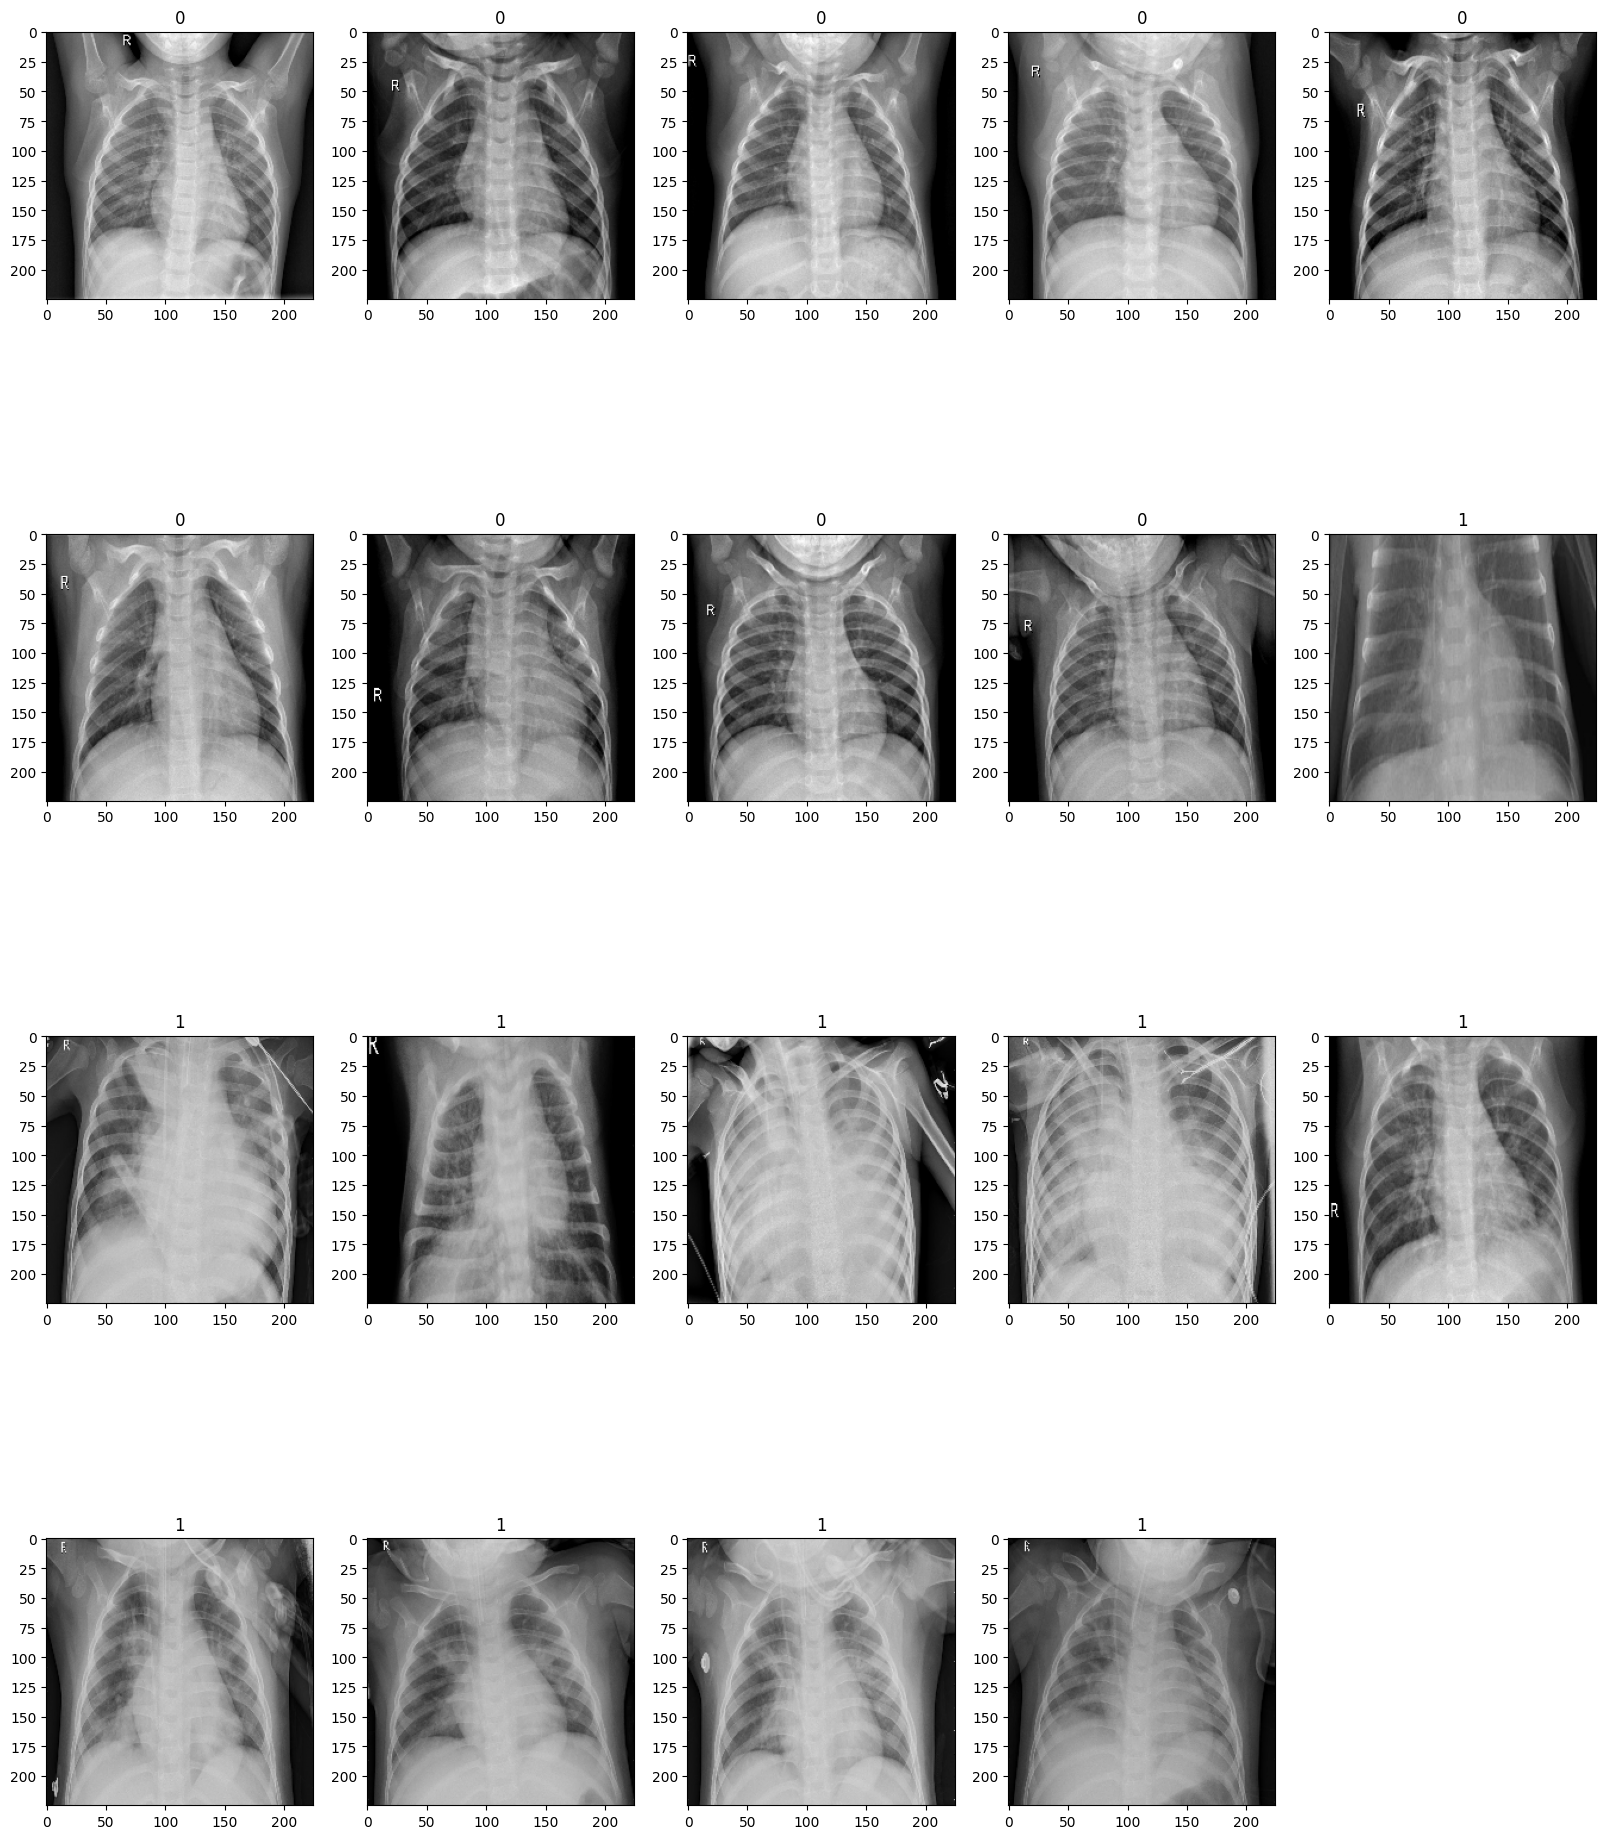

In [5]:
plt.figure(figsize=(20, 25))
for i, (img, label) in enumerate(zip(train_list, train_labels)):
    if i <= 10 or i >= len(train_list) - 10:
        plt.subplot(4, 5, (i+1 if i < 11 else i - len(train_labels) + 20))
        plt.imshow(img), plt.title(label) 

In [6]:
test_class1 = loading_and_processing(os.path.join(test_dir, 'NORMAL'))
test_class2 = loading_and_processing(os.path.join(test_dir, 'PNEUMONIA'))
test_list= test_class1 + test_class2
test_labels = [0]*len(test_class1) + [1]*len(test_class2)

print('length of inputs: ', len(test_list))
print('length of outputs: ', len(test_labels))

length of inputs:  624
length of outputs:  624


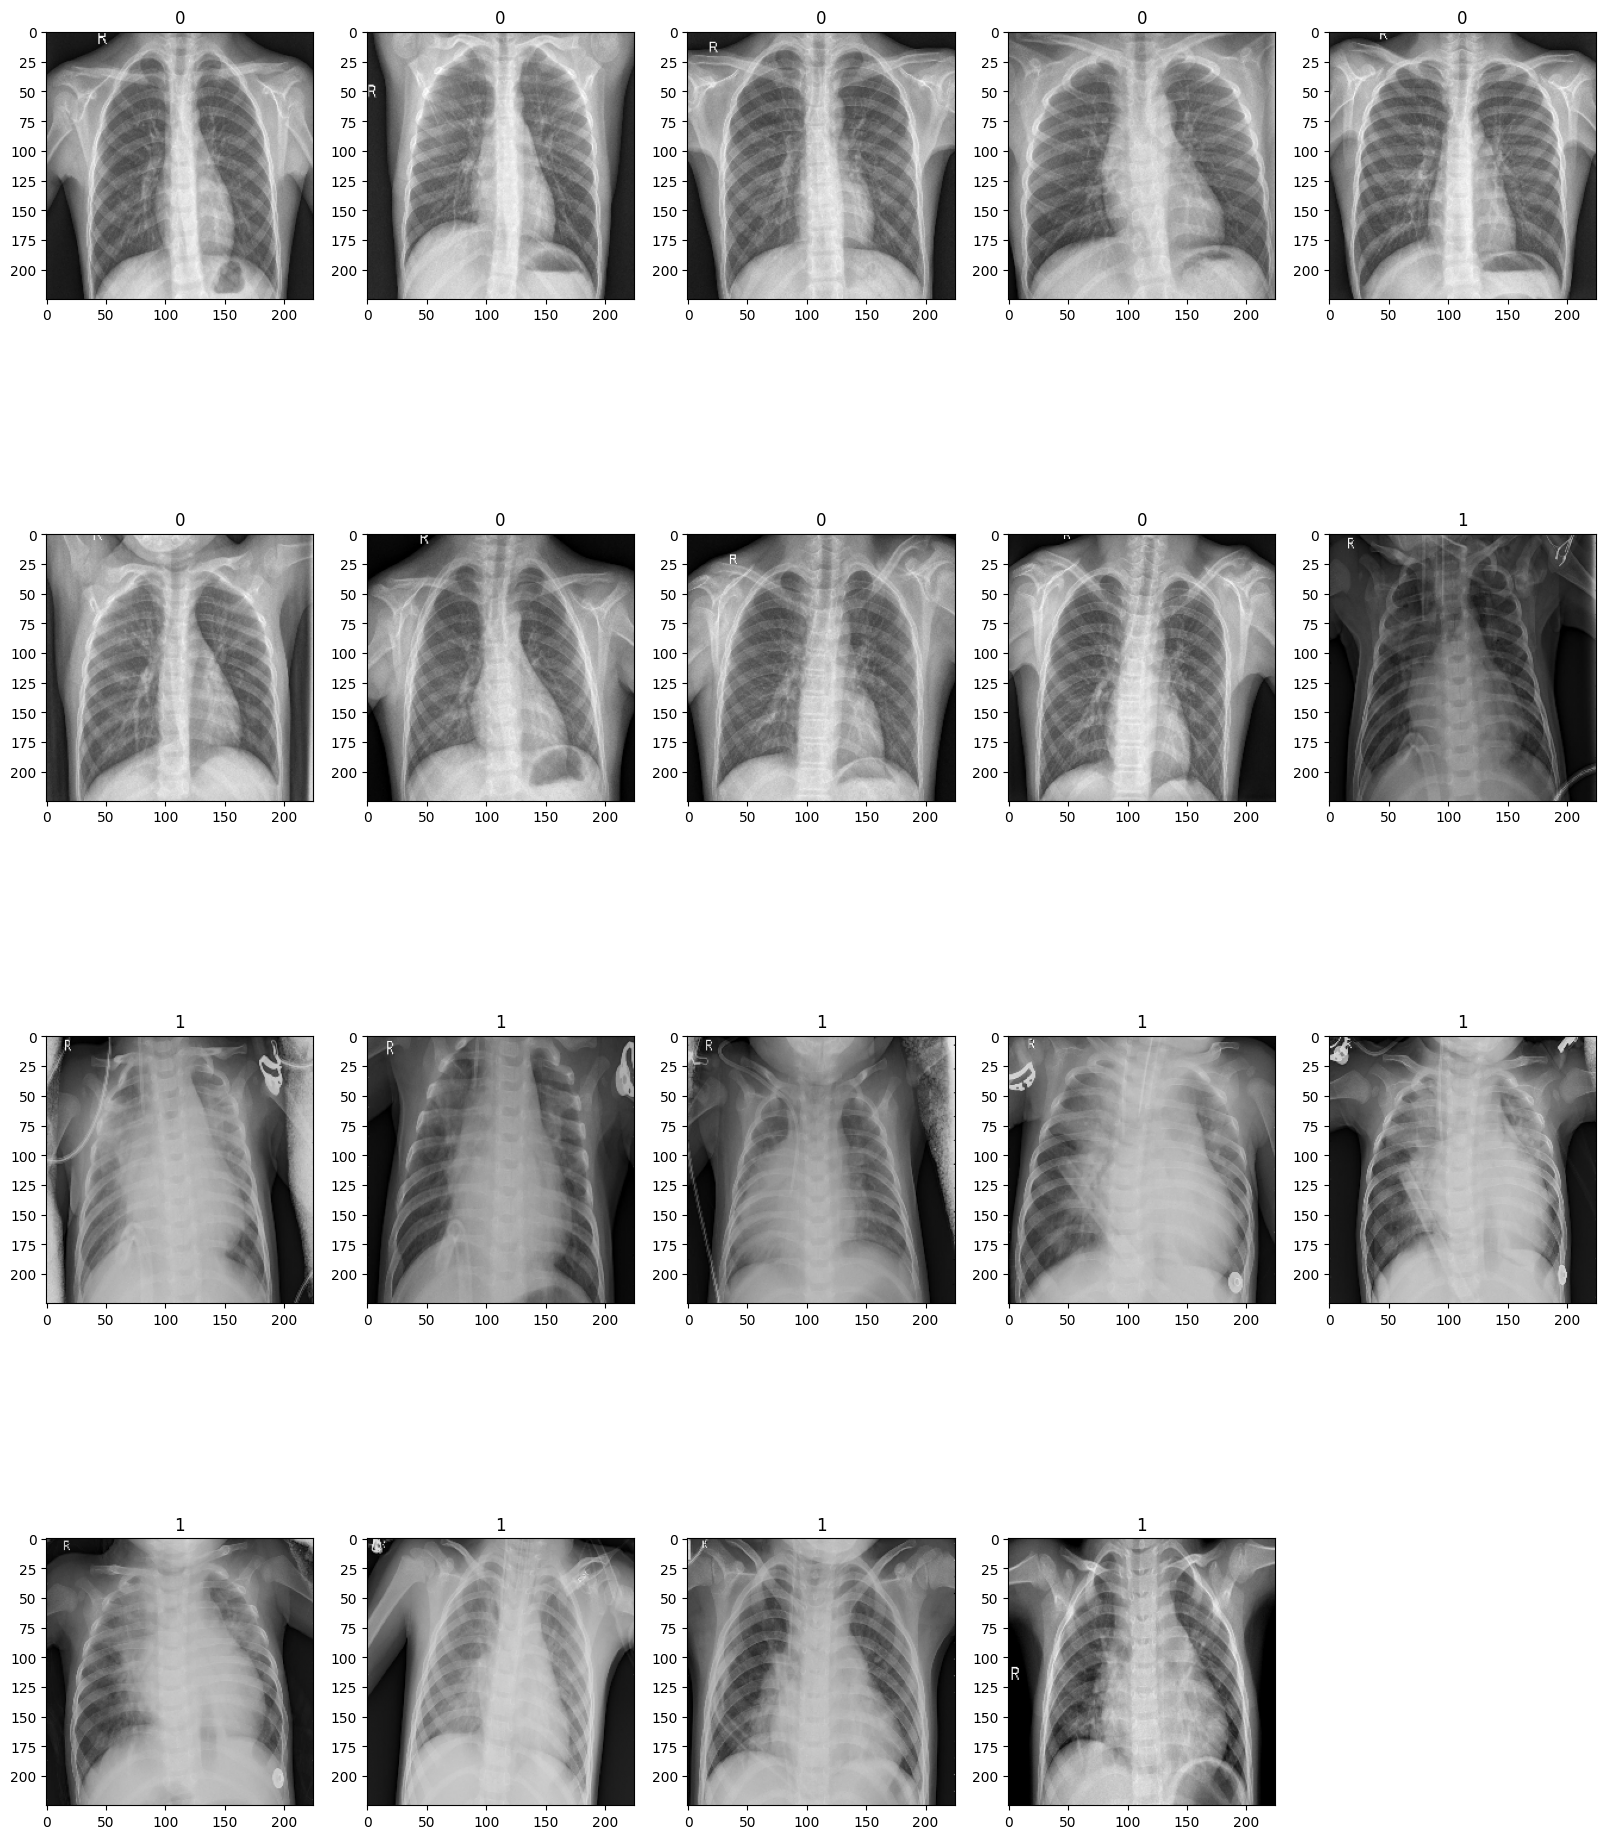

In [7]:
plt.figure(figsize=(20, 25))
for i, (img, label) in enumerate(zip(test_list, test_labels)):
    if i < 10 or i >= len(test_labels) - 10:
        plt.subplot(4, 5, (i+1 if i < 10 else i - len(test_labels) + 20))
        plt.imshow(img), plt.title(label) 

---

# Model Building

In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils

In [9]:
X_train = np.array(train_list)
X_test = np.array(test_list)

In [10]:
y_train = utils.to_categorical(train_labels, num_classes=2)
y_test = utils.to_categorical(test_labels, num_classes=2)

In [11]:
# Model building
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', strides=1, activation='relu', input_shape=(X_train[0].shape)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', strides=1, activation='relu', input_shape=(X_train[0].shape)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 225, 225, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,869,634 (49.09 MB)

 Trainable params: 12,869,634 (49.09 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 449ms/step - accuracy: 0.8195 - loss: 0.5632 - val_accuracy: 0.7244 - val_loss: 0.8867
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9488 - loss: 0.1321 - val_accuracy: 0.6811 - val_loss: 1.4600
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 858ms/step - accuracy: 0.9762 - loss: 0.0637 - val_accuracy: 0.7436 - val_loss: 0.9864
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.9840 - loss: 0.0429 - val_accuracy: 0.7067 - val_loss: 1.2835
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 417ms/step - accuracy: 0.9881 - loss: 0.0365 - val_accuracy: 0.7628 - val_loss: 1.6779
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 496ms/step - accuracy: 0.9905 - loss: 0.0263 - val_accuracy: 0.7500 - val_loss: 1.6625
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9914 - loss: 0.0274 - val_accuracy: 0.7372 - val_loss: 2.0836
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9956 - loss: 0.0143 -

---

# Model Evaluation

In [14]:
# Create predictions
preds = model.predict(X_test)

preds

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step


array([[9.0668410e-01, 9.3315832e-02],
       [1.5934996e-04, 9.9984062e-01],
       [1.2460234e-02, 9.8753977e-01],
       ...,
       [1.0653476e-07, 9.9999988e-01],
       [1.5635732e-04, 9.9984360e-01],
       [8.1581791e-04, 9.9918419e-01]], dtype=float32)

In [15]:
# Parse predections so they are either 0 or 1
PREDS = np.argmax(np.round(preds), axis=1)

PREDS

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

class_report = classification_report(test_labels, PREDS)
print('Classification Report:\n', class_report)

conf_matrix = confusion_matrix(test_labels, PREDS)
print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.24      0.39       234
           1       0.69      1.00      0.81       390

    accuracy                           0.71       624
   macro avg       0.84      0.62      0.60       624
weighted avg       0.80      0.71      0.66       624

Confusion Matrix:
 [[ 57 177]
 [  1 389]]


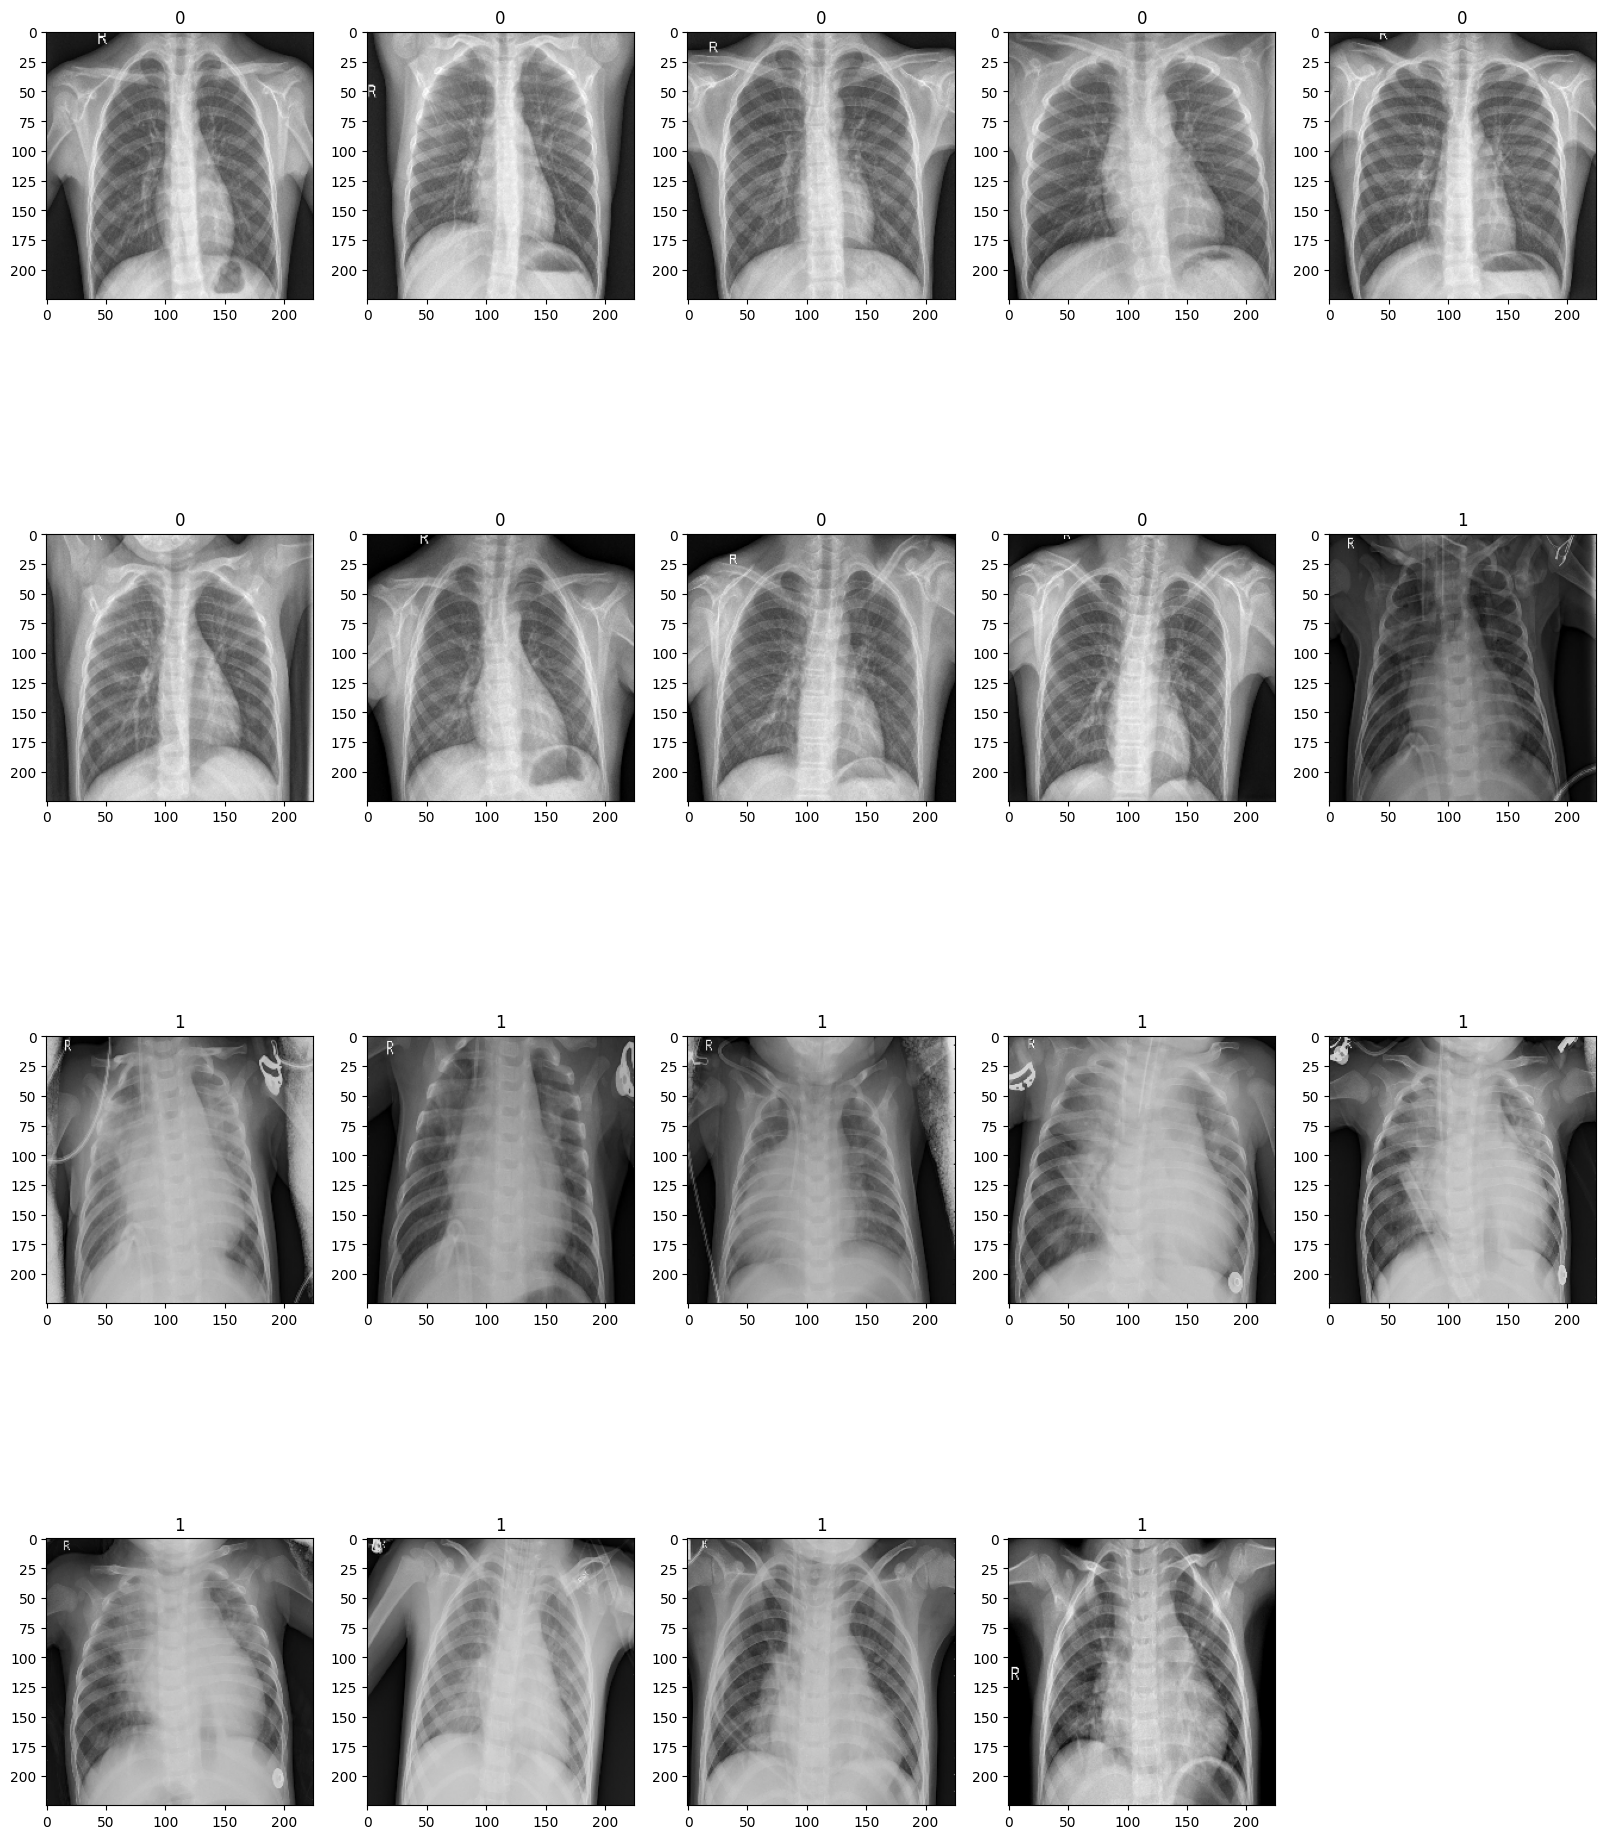

In [18]:
# show all predicted images with their predicted title
plt.figure(figsize=(20, 25))
for i, (img, label) in enumerate(zip(test_list, test_labels)):
    if i < 10 or i >= len(test_labels) - 10:
        plt.subplot(4, 5, (i+1 if i < 10 else i - len(test_labels) + 20))
        if pred == 0:
            pred= 'NORAML'
        elif pred == 1:
            pred= 'PNEUMONIA'
        plt.imshow(img), plt.title(label) 

In [ ]:
model.save(dir + '/Medical Analysis Model.keras')

The final model shows high accuracy in detecting diseases from X-ray images, achieving strong metrics in accuracy, precision, recall, and F1 score. Confusion matrices confirmed its robust performance across different classes, indicating its potential for clinical use.

However, the model's performance varied with different abnormalities, suggesting a need for further tuning or additional data for less common conditions. The reliance on a single dataset raises concerns about generalizability to diverse images.

Future improvements could include refining the CNN architecture, experimenting with ensemble methods, and incorporating transfer learning. Continuous evaluation in practical applications will help identify areas for enhancement, leading to a more reliable medical image analysis tool.